Binary Classifications

Binary classiffication : It is a type of supervised learning in which a machine learning model is trainde to predict one of two possible outcomes, usually represented as 0 or 1, true and false, positive, or negative, etc. the goal of binary classification is to separate the data into two classes or categories based on certain features or attributes of the data.

In [16]:
from sklearn.datasets import make_circles
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
X, y = make_circles(n_samples = 10000,
                    noise = 0.03,
                    random_state = 42)


In [18]:
#check the make moon dataset features and shape

print(f"There are {X.shape[0]} row with {X.shape[1]} features")
print(f"The first 1- samples of dataset look likes : \n{X[:10,]}")


There are 10000 row with 2 features
The first 1- samples of dataset look likes : 
[[ 0.0464692   0.82477834]
 [ 1.00506323 -0.43335153]
 [-0.58348442  0.79452834]
 [ 0.98478298 -0.32517879]
 [ 0.82993028 -0.54722305]
 [-0.13392877  0.77624858]
 [ 0.77919743  0.64581132]
 [ 0.72295477  0.17383084]
 [-0.12180665  0.79695076]
 [ 0.84952936  0.50567829]]


In [19]:
#Check the make circles dataset target and shape

print(f"There are {y.shape[0]} rows with 2 binary target")
print(f"The fisrt 1- samples of data set look likes : \n{y[:10]}")

There are 10000 rows with 2 binary target
The fisrt 1- samples of data set look likes : 
[1 0 0 0 0 1 0 1 1 0]


In [20]:
#Creat a dataframe to visualize data
moons = pd.DataFrame({'feature_0' : X[:,0],'feature_1':X[:,1],'labels':y})
moons

,feature_0,feature_1,labels
0,0.046469,0.824778,1
1,1.005063,-0.433352,0
2,-0.583484,0.794528,0
3,0.984783,-0.325179,0
4,0.829930,-0.547223,0
...,...,...,...
9995,0.505764,0.662722,1
9996,0.790650,0.218306,1
9997,0.685458,0.372980,1
9998,0.474403,0.884920,0


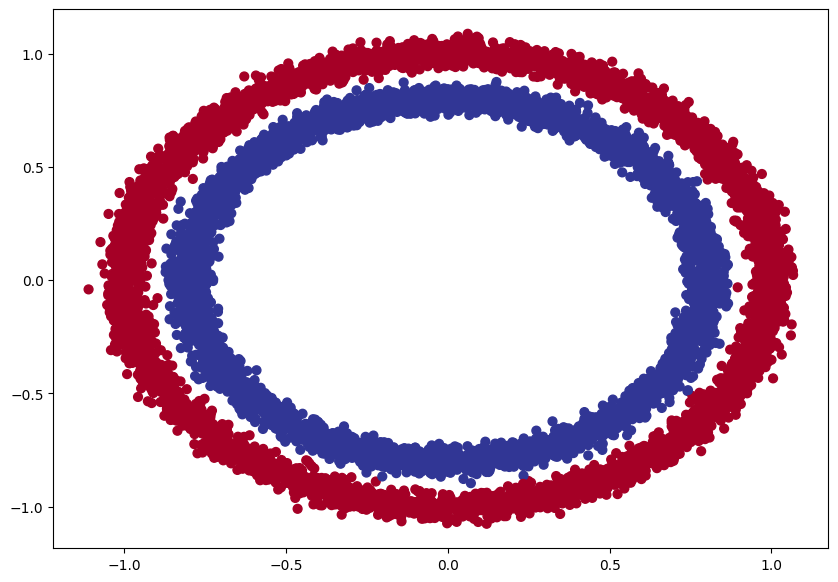

In [21]:
#Visualing the data
plt.figure(figsize = (10,7))
plt.scatter(moons['feature_0'],moons['feature_1'],c=y, s=40, cmap = plt.cm.RdYlBu)

Loss used in binary classification problem :

- Binary cross-entropy, also known as log loss, is a commonly used loss function in binary classification tasks. It measures the dissimilarity between the predicted probabilities and the true binary labels of the data. The binary cross-entropy loss is calculated using the following formula: 
-(y*log(p) + (1-y) * log(1-p))


In [22]:
#Example binary classification labels (0,1)
true_labels = [1, 0, 1, 1, 0]

#Example predicted probabilities for the positive class
predicted_probs = [0.8, 0.2, 0.6, 0.9, 0.3]

#Convert the true labels and predicted probabilities to TensorFlow tensors
true_labels_tensor = tf.constant(true_labels, dtype = tf.float32)
predicted_probs_tesnor = tf.constant(predicted_probs, dtype=tf.float32)

#Calculate the binary cross-entropy loss
bce_loss = tf.keras.losses.BinaryCrossentropy()(true_labels_tensor, predicted_probs_tesnor)

#Print the calculated loss 
print("Binary Cross-Entropy Loss:" , bce_loss.numpy())

Binary Cross-Entropy Loss: 0.28382948


Neural Network With Linear Activation 

linear activation: it is also known as the identity fucntion, is a simple activation function that computes a weighted sum of the inputs without applying any non-linear transformation. Mathematically, the out put of a linear activation function can be represented as : 
                f(x) = x 

In [23]:
#Create a toy tensor ( similar to the data was pass into our models ) 

A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

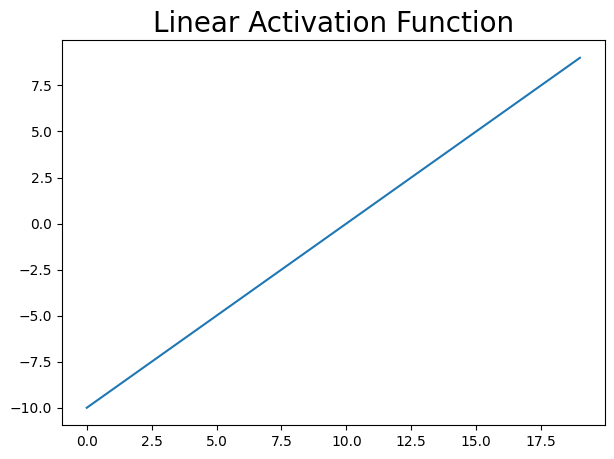

In [24]:
plt.figure(figsize = (7,5))
plt.plot(tf.keras.activations.linear(A))
plt.title("Linear Activation Function", fontdict = {'size':20})
plt.show()

In [25]:
#Train Test spliting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, shuffle = True)


In [26]:
#set the seed for reproducibility of output
tf.random.set_seed(42)

# 1. Creat a model
model_linear = tf.keras.Sequential([
    tf.keras.layers.Dense(20, input_shape = [2]),
    tf.keras.layers.Dense(20),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_linear.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                     optimizer = tf.keras.optimizers.SGD(),
                     metrics = ['accuracy'])

# 3. fit the model
history_linear = model_linear.fit(X_train,y_train, validation_split = 0.15, epochs = 100)


Epoch 1/100
213/213 [==============================] - 1s 2ms/step - loss: 1.0915 - accuracy: 0.5110 - val_loss: 0.6985 - val_accuracy: 0.4992
Epoch 2/100
213/213 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 0.4969 - val_loss: 0.6912 - val_accuracy: 0.5425
Epoch 3/100
213/213 [==============================] - 0s 2ms/step - loss: 0.6961 - accuracy: 0.5059 - val_loss: 0.6966 - val_accuracy: 0.4992
Epoch 4/100
213/213 [==============================] - 0s 2ms/step - loss: 0.6955 - accuracy: 0.5046 - val_loss: 0.6971 - val_accuracy: 0.5050
Epoch 5/100
213/213 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.5106 - val_loss: 0.6950 - val_accuracy: 0.5667
Epoch 6/100
213/213 [==============================] - 0s 2ms/step - loss: 0.6960 - accuracy: 0.5054 - val_loss: 0.6981 - val_accuracy: 0.4558
Epoch 7/100
213/213 [==============================] - 0s 2ms/step - loss: 0.6962 - accuracy: 0.5044 - val_loss: 0.6962 - val_accuracy: 0.4608

Loss accuracy curve function

In [33]:
def plot_loss_accuracy_curve(history):
    """
    Take history variable and plot loss and accuracy curve
    """
    #creating a subplot
    fig, ax = plt.subplots(1,2,figsize = (10,7))
    fig.subplots_adjust(right =2)# set left padding in graph
    ax = ax.ravel()
    
    #this is for plotting loss curve and lowest accuracy on training data
    pd.DataFrame({'loss':history.history['loss'],'Val_loss':history.history['val_loss']}).\
        plot(title = 'loss',ax = ax[0]) # plot loss curve
    
    ax[0].text(len(history.history['loss']),history.history['loss'][-1],
              'Min Loss: {}'.format(round(history.history['loss'][-1],2)),
              fontdict={'size':15})
    
    # This is for plotting accuracy curve and highest accuracy on training data

    pd.DataFrame({'Accuracy':history.history['accuracy'],'Val_Accuracy':history.history['val_accuracy']})\
        .plot(title='Accuracy',ax=ax[1]) # Plot accuracy curve

    ax[1].text(len(history.history['accuracy']),history.history['accuracy'][-1], # Annotate Highest Accuracy
               'Max Acc: {}'.format(round(history.history['accuracy'][-1],2)),
               fontdict={'size':15})
    plt.show() # Show plot

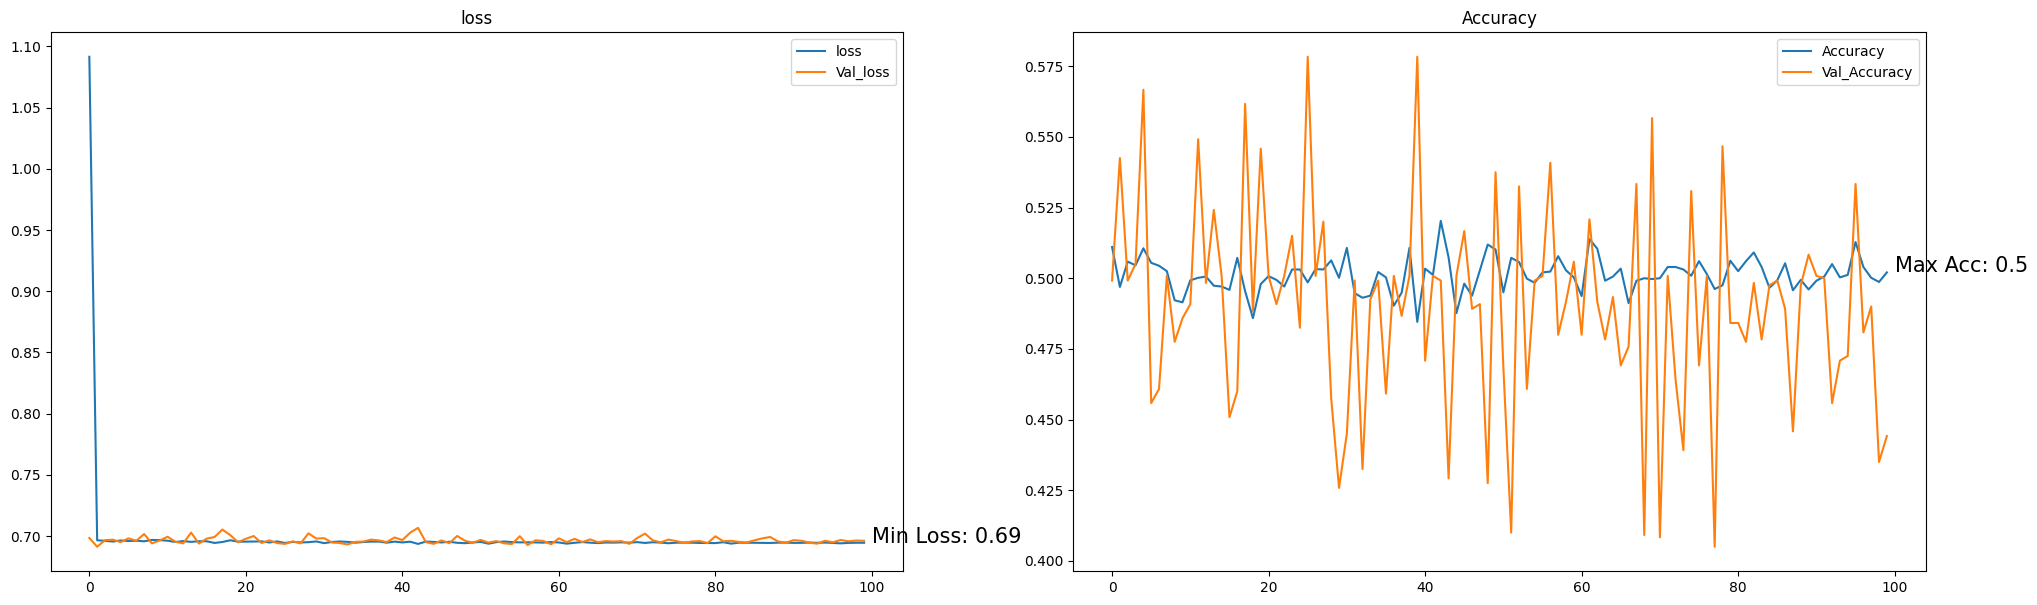

In [34]:
plot_loss_accuracy_curve(history = history_linear)

Evaluate model on testing data


In [35]:
model_linear.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.6946 - accuracy: 0.4545


[0.6945705413818359, 0.4544999897480011]

Function to visualize the sepration of data

In [36]:
import numpy as np

def plot_decision_boundry(model,X,y):
    """
    plots the decision boundry created by a model predictiong on x
    """
    #Define the axis boundries of the plot and create a meshgrid
    x_min, x_max = X[:,0].min()-0.1,X[:,0].max()+0.1
    y_min, y_max = X[:,1].min()-0.1, X[:,1].max()+0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max,100),
                         np.linspace(y_min, y_max, 100))
    
    #create X value ( we're going to make prediction on these)
    x_in = np.c_[xx.ravel(),yy.ravel()] # stack 2D arrays togathere
    
    #Make prediction
    y_pred = model.predict(x_in)
    
    #check for muti class
    if len(y_pred[0]) >1:
        print("doing multiclass calssification")
        #we have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred,axis = 1).reshape(xx.shape)
    else:
        print('doing binary classification')
        y_pred = np.round(y_pred).reshape(xx.shape)
        
    #plot the decisioin boundry
    plt.figure(figsize = (10,7))
    plt.contourf(xx, yy, y_pred,cmap = plt.cm.RdYlBu, alpha = 0.7)
    plt.scatter(X[:,0], X[:,1],c=y, s = 40, cmap = plt.cm.RdYlBu)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(), yy.max())

doing binary classification


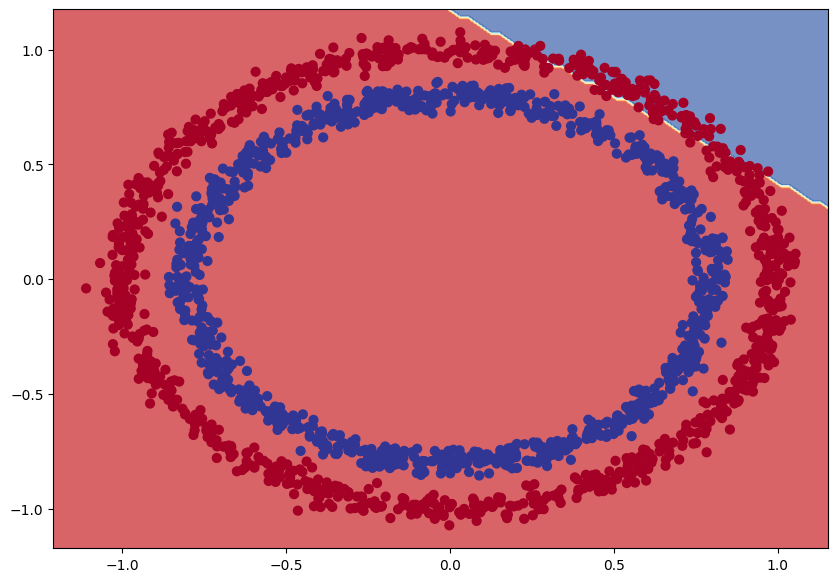

In [37]:
plot_decision_boundry(model=model_linear,X=X_test,y=y_test)

Neural Network with non-linear activation 

Hidden layer activation functions (non-linear)

Relu :
f(x) = max(0,x)

In [39]:
def relu(a):
    return tf.maximum(0,a)

In [40]:
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

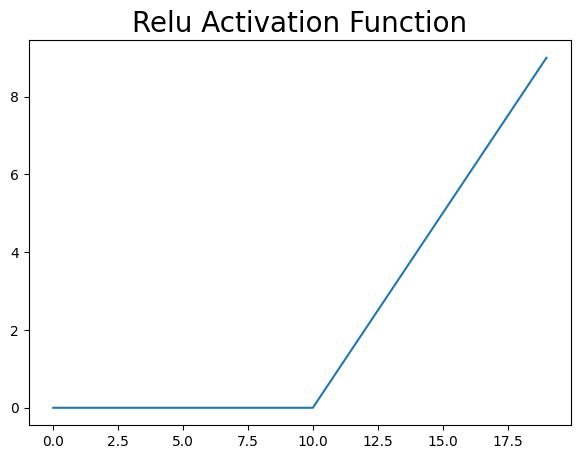

In [41]:
plt.figure(figsize=(7,5))
plt.plot(relu(A))
plt.title("Relu Activation Function",fontdict={'size':20})
plt.show()

Output layer activation functions(non-linear)

sigmoid:
f(x) = 1/(1+e^(-x))

In [42]:
def sigmoid(a):
    return (1/(1+tf.math.exp(-a)))

In [43]:
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

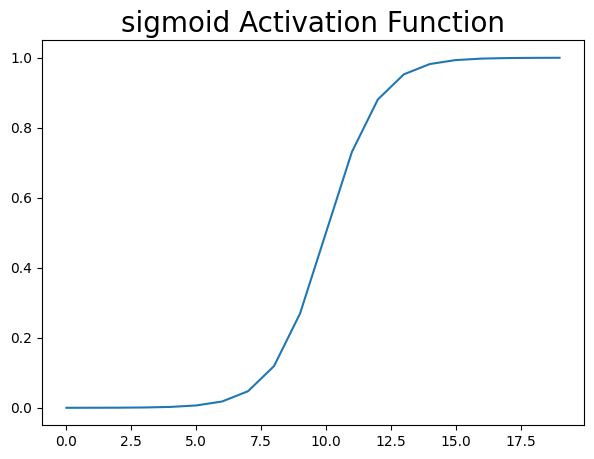

In [45]:
plt.figure(figsize=(7,5))
plt.plot(sigmoid(A))
plt.title("sigmoid Activation Function",fontdict={'size':20})
plt.show()

Creat a neural network with linear activation

In [46]:
# Set seed for result reproducibility
tf.random.set_seed(42)

# 1. Create model
model_non_linear_hidd=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu',input_shape=[2]),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile Model
model_non_linear_hidd.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                              optimizer=tf.keras.optimizers.Adam(),
                              metrics=['accuracy'])

# 3. Fit the model
history_non_linear_hidd=model_non_linear_hidd.fit(X_train,y_train,validation_split=0.15,epochs=50,verbose=0)

Evaluate model on testing Data

In [47]:
model_non_linear_hidd.evaluate(X_test,y_test)

63/63 [==============================] - 0s 1ms/step - loss: 7.6585 - accuracy: 0.5035


[7.658485412597656, 0.5034999847412109]

Loss and accuracy curves 

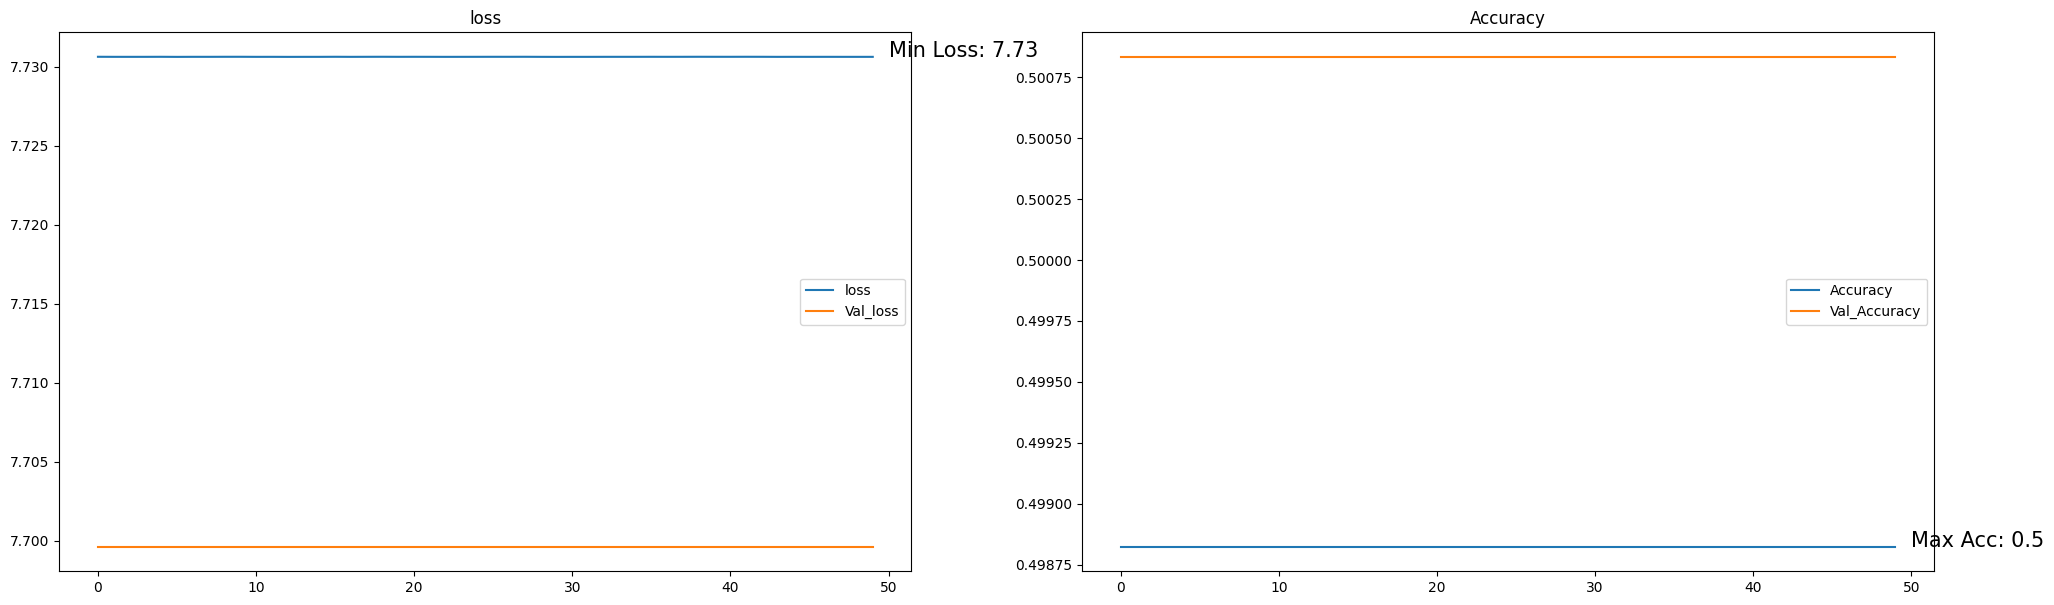

In [48]:
plot_loss_accuracy_curve(history_non_linear_hidd)

Checking from sepration boundry

doing binary classification


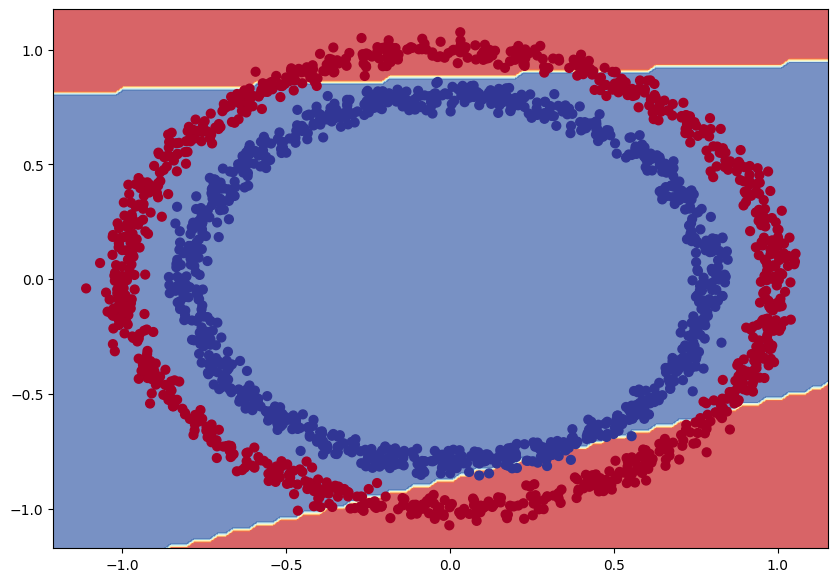

In [49]:
plot_decision_boundry(model=model_non_linear_hidd,X=X_test,y=y_test)

Model non linear(only with non-linear hidden activation + output activation) and optimizer adam

In [50]:
# Set seed for result reproducibility
tf.random.set_seed(42)

# 1. Create model
model_non_linear=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu',input_shape=[2]),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

# 2. Compile Model
model_non_linear.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                              optimizer=tf.keras.optimizers.Adam(),
                              metrics=['accuracy'])

# 3. Fit the model
history_non_linear=model_non_linear.fit(X_train,y_train,validation_split=0.15,epochs=50,verbose=0)

Evaluate model on testing data

In [52]:
model_non_linear.evaluate(X_test,y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.0260 - accuracy: 0.9955


[0.025982186198234558, 0.9955000281333923]

Loss and accuracy curves

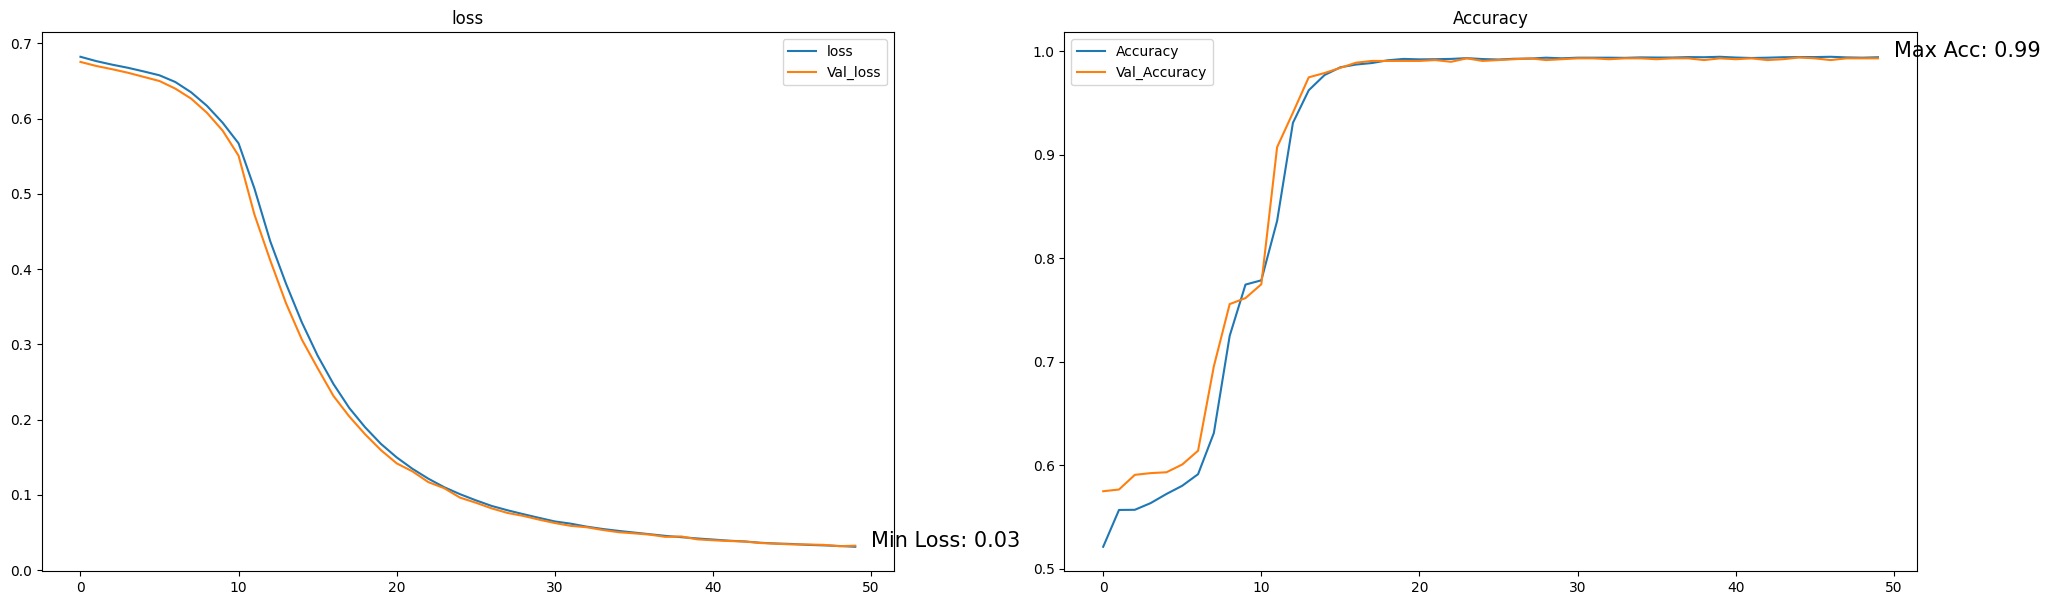

In [53]:
plot_loss_accuracy_curve(history=history_non_linear)

checking from sepration boundry

doing binary classification


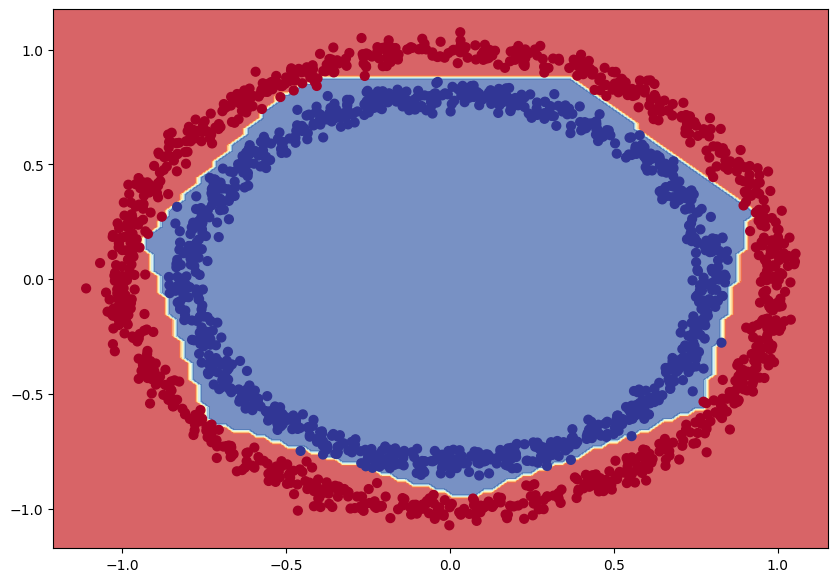

In [54]:
plot_decision_boundry(model=model_non_linear,
                      X=X_test,
                      y=y_test)

## More classification evaluation methods

Alongside to visualizing our models results as much as possible,
there are a handful of the other classification evaluation methods
& metrics you should be familiar with.
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from scikit-learn)

In [55]:
# Check the accuracy of our model
loss,accuracy=model_non_linear.evaluate(X_test,y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

63/63 [==============================] - 0s 1ms/step - loss: 0.0260 - accuracy: 0.9955
Model loss on the test set: 0.025982186198234558
Model accuracy on the test set: 99.55%


In [56]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix
y_pred=tf.round(model_non_linear.predict(X_test))
confusion_matrix(y_test,y_pred)

array([[1002,    5],
       [   4,  989]])

## How about a confusion matrix.

In [57]:
from sklearn.metrics import confusion_matrix
y_pred=model_non_linear.predict(X_test)

## How about we pretify our confusion matrix

In [58]:
import seaborn as sns
def plot_confusion_matrix(y_test,y_pred,figsize,classes):
    plt.figure(figsize=figsize)
    plt.title('Confusion Matrix')
    # Check for muti-class
    if y_pred.shape[1]>1:
        print('doing multiclass calssification')
        # We have to reshape our prediction to get them ready for plotting
        n=y_pred.shape[1]
        y_pred=np.argmax(y_pred,axis=1)
        cf_matrix=confusion_matrix(y_test,y_pred) # Create a confusion matrix
        group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()] # Creates a flatten array of group count
        group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix,axis=1)[0]]
        labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_counts,group_percentages)]
        labels = np.asarray(labels).reshape(n,n)
    else:
        print('doing binary classification')
        y_pred=np.round(y_pred)
        cf_matrix=confusion_matrix(y_test,y_pred) # Create a confusion matrix
        group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()] # Creates a flatten array of group count
        group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
        labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_counts,group_percentages)]
        labels = np.asarray(labels).reshape(y_pred.shape[1]+1,-1)
    sns.heatmap(cf_matrix, annot=labels,xticklabels=classes,yticklabels=classes,fmt='', cmap=plt.cm.Blues_r)
    plt.show()

doing binary classification


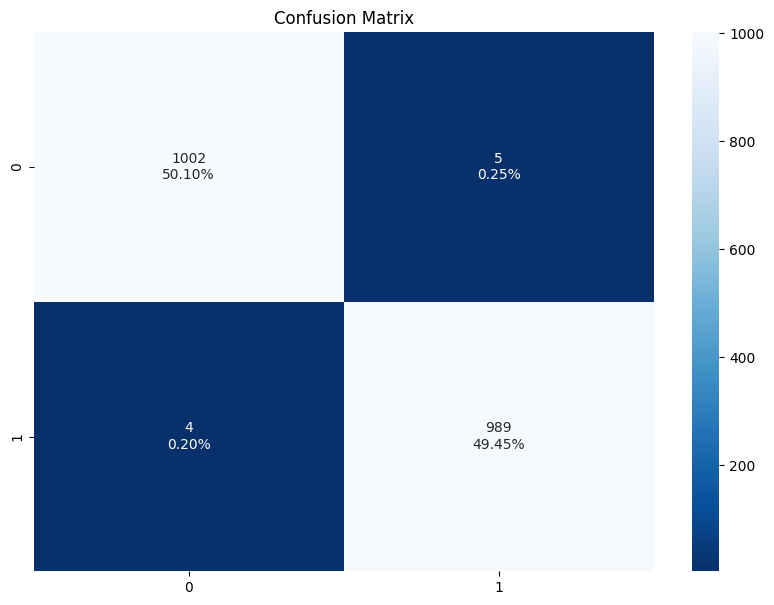

In [59]:
plot_confusion_matrix(y_test,y_pred,figsize=(10,7),classes=['0','1'])